# Introduction

We're told by our colleagues at the hypothetical company that customer churn is at 50% within 3 months. That means that within 3 months of a set of customers that sign up for the paid product, by the end of 3 months half of them will have cancelled. This is an urgent problem we need to help fix with machine learning!


## Metadata

Here are some types of data that are useful in customer churn analysis:
* Customer ID or other identification information
* Date the customer was acquired
* How the customer was acquired (source of sale i.e. referral, web signup, etc.)
* Plan type (what subscription they are on)
* Cohort analysis by user type (seasonal onboards by marketing campaign or time of year, etc.)
* If they use add ons (sush as Online Security or Device Protection)? 
* Have they set up to pay for their subscription online? 
* Customer size
* Customer segment type (i.e. company user, accountant)
* Customer country of residence
* Customer state of residence
* NPS score (satisfaction level 0-10 from questionnaire) 
* Time to first success moment (days)
* Total number of times logged in
* Time since last login
* Days since key inflection points (work with SME in marketing/product) this could be days since logging in, since getting their first result from the technology, etc. 
* Time spent logged in past month
* Time spent logged in average/mo for length of subscription
* Number of times they have contacted customer service over life of subscription
* Number of customer service calls in the prior month that they cancelled
* Number of times they opened and clicked on the Help text in the app or online
* What they typed into the search box in the help text in the app
* Tenure (Lifetime account duration in days)
* Total subscription amount paid
* Date unsubscribed (timestamp)
* How many other products they have from our company
* What other products they have from our company, as a separate column for each (yes / no)
* Anything else specific to the business of note
* Cancelled yes or no (Churn)

# CP: Preparation

### Install Package

In [ ]:
!pip install dalex
!pip install scikit-plot
!pip install xgboost
!pip install feature_engine
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.4 MB/s 
  Created wheel for dalex: filename=dalex-1.5.0-py3-none-any.whl size=1043321 sha256=095dac7d67d19f132cc908bbbf68da28d6a1d6a17cfbbcade0fbbb57f874ec32
  Stored in directory: /root/.cache/pip/wheels/b1/02/58/77ac4cb307fec9f3324c6aa4f9f23a7b0e886e313ebc280257
Successfully built dalex
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 290 kB 7.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# load pandas untuk data wrangling
import pandas as pd
# load numpy untuk manipulasi vektor
import numpy as np
# load matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# load seaborn untuk visualisasi data
import seaborn as sns

# load metrics object dari sklearn
from sklearn import metrics
# load train-test data splitter
from sklearn.model_selection import train_test_split
# load Decision Tree classifier model
from sklearn.tree import DecisionTreeClassifier
# load Random Forest classifier model
from sklearn.ensemble import RandomForestClassifier
# load SVM classifier model
from sklearn.svm import SVC
# load KNN classifier model
from sklearn.neighbors import KNeighborsClassifier

# load xgboost classifier model
from xgboost import XGBClassifier

# Load DALEX untuk interpretability
import dalex as dx

# load scikitplot untuk visualisasi metrik
import scikitplot as skplt

%matplotlib inline

# for Q-Q plots
import scipy.stats as stats
from feature_engine.outliers import Winsorizer
from scipy.stats import chi2_contingency

#Confusion Matrix
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,plot_roc_curve,accuracy_score

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [ ]:
# load dataset ke raw_data
raw_data = pd.read_csv('/content/drive/MyDrive/BI Bootcamp/Machine Learning/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# CP: Data Quick Look

### Data View & Data Type

In [ ]:
# cek struktur data
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df = raw_data.copy()

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Shape

In [ ]:
df.shape

(7043, 21)

### Duplicated Data

In [ ]:
df.duplicated().sum()

0

### Missing Value Data

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)

In [ ]:
count_per_feature = df.isnull().sum()
count_per_feature[count_per_feature>0]

TotalCharges    11
dtype: int64

looks there're 11 missing value on TotalCharges

### Statistic Summary

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Exploratory Data Analysis

#### Number of Unique Category each Column

In [ ]:
columns_name =[]
unique_value=[]
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        columns_name.append(str(col)) 
        unique_value.append(df[col].nunique())
table= pd.DataFrame()
table['Columns'] = columns_name
table['Unique']= unique_value
            
table=table.sort_values('Unique',ascending=False)
table

,Columns,Unique
0,customerID,7043
16,TotalCharges,6530
15,PaymentMethod,4
8,OnlineBackup,3
13,Contract,3
12,StreamingMovies,3
11,StreamingTV,3
10,TechSupport,3
9,DeviceProtection,3
7,OnlineSecurity,3


In [ ]:
#make function to check unique value from each column

column_name = df.columns
for i in column_name:
    print('Column Name: {}'.format(i))
    print(df[i].unique())

Column Name: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column Name: gender
['Female' 'Male']
Column Name: SeniorCitizen
[0 1]
Column Name: Partner
['Yes' 'No']
Column Name: Dependents
['No' 'Yes']
Column Name: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column Name: PhoneService
['No' 'Yes']
Column Name: MultipleLines
['No phone service' 'No' 'Yes']
Column Name: InternetService
['DSL' 'Fiber optic' 'No']
Column Name: OnlineSecurity
['No' 'Yes' 'No internet service']
Column Name: OnlineBackup
['Yes' 'No' 'No internet service']
Column Name: DeviceProtection
['No' 'Yes' 'No internet service']
Column Name: TechSupport
['No' 'Yes' 'No internet service']
Column Name: StreamingTV
['No' 'Yes' 'No internet service']
Column Name: StreamingMovies
['No' 'Yes' '

There is colum that need to change to the right data type

`TotalCharges` should be float, not object

#### Target Exploratory

In [ ]:
# Check the target distribution
grouped = df.groupby(by='Churn').size()
grouped

Churn
No     5174
Yes    1869
dtype: int64

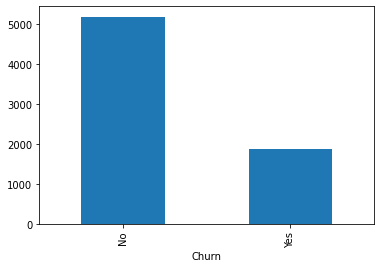

In [ ]:
grouped.plot.bar()

#### Tenure

In [ ]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

#### Total Charges

In [ ]:
df['TotalCharges'].describe()

count     7032
unique    6530
top       20.2
freq        11
Name: TotalCharges, dtype: object

#### Monthly Charges

In [ ]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

# CP: Miscellaneous Handling

### Change Column Name

In [ ]:
df.rename(columns={'customerID':'CustomerID','gender':'Gender','tenure':'Tenure'}, inplace=True)

In [ ]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Change Data Type

In [ ]:
#change the data type of `TotalCharges`
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


now the each colomn have the right data type

### Handling for Missing Value

In [ ]:
#handling missing value
df['TotalCharges'] = df['TotalCharges'].fillna(0)

there are 11 missing value on `TotalCharges`

inputting 0 into the missing value wouldn't change the distribution of the data

In [ ]:
df.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#handling duplicated 
df.duplicated(['CustomerID']).sum()

0

### Correlations

We do the correlations in #CP3 because we need to change the wrong data type first, then we can do the correlations

cause our data has numeric and categorical(object) types, we have to make correlations for categorical and numerical because we haven't transformed categorical data to numeric

#### Correlation Between Numerikal Variables

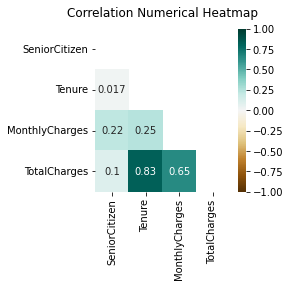

In [ ]:
# Increase the size of the heatmap
plt.figure(figsize=(3,3))

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap
heatmap.set_title('Correlation Numerical Heatmap', fontdict={'fontsize':12}, pad=12);

**Interpretasi**



- high correlations: `tenure` and `TotalCharges`,  the long  `Tenure` that they have, the high `TotalCharges` that they have paid.
- mid correlations: `Totalcharges` and `MonthlyCharges`
- low correlations: `tenure` with `SeniorCitizen`; `TotalCharges` with `SeniorCitizen`; and `MonthlyCharges` with `SeniorCitizen`.

we have a high correlation from each variabel, the rule said we must choose one variabel that have a big impact to predict Churn, but we just make a classification, not a linear regression, so we can keep them both

#### Correlation Between Qualitative Variables (Categorical)

In [ ]:
def cramers_corrected_stat(contingency_table):
    """
        Computes corrected Cramer's V statistic for categorial-categorial association
    """
    
    try:
        chi2 = chi2_contingency(contingency_table)[0]
    except ValueError:
        return np.NaN
    
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    
    r, k = contingency_table.shape
    r_corrected = r - (((r-1)**2)/(n-1))
    k_corrected = k - (((k-1)**2)/(n-1))
    phi2_corrected = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    
    return (phi2_corrected / min( (k_corrected-1), (r_corrected-1)))**0.5

In [ ]:
def categorical_corr_matrix(data):
    """
        Computes corrected Cramer's V statistic between all the
        categorical variables in the dataframe
    """
    data = data.select_dtypes(include='object')
    cols = data.columns
    n = len(cols)
    corr_matrix = pd.DataFrame(np.zeros(shape=(n, n)), index=cols, columns=cols)
    
    excluded_cols = list()
    
    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1
                break
            data_crosstab = pd.crosstab(data[col1], data[col2], dropna=False)
            corr_matrix.loc[col1, col2] = cramers_corrected_stat(data_crosstab)
                
    # Flip and add to get full correlation matrix
    corr_matrix += np.tril(corr_matrix, k=-1).T
    return corr_matrix

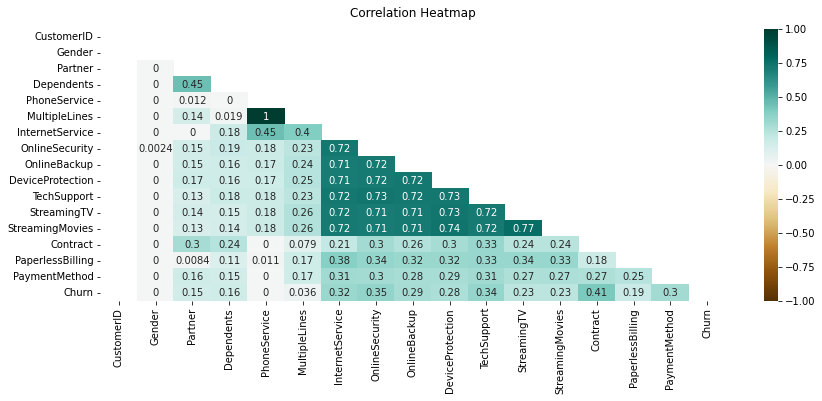

In [ ]:
# Increase the size of the heatmap
plt.figure(figsize=(14,5))

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap
mask = np.triu(np.ones_like(categorical_corr_matrix(df), dtype=np.bool))
heatmap = sns.heatmap(categorical_corr_matrix(df), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Interpretation**
- high correlation : `MultipleLines` dengan `PhoneService` (it means every customer who signed up for multipleliner also have phoneservice), `InternetService` with `StreamingMovies`, `StreamingTV`, `TechSupport`, `DeviceProtection`, `OnlineBackup`, `OnlineSecurity`. ; correlation between `OnlineSecurity` with `StreamingMovies`, `StreamingTV`, `TechSupport`, `DeviceProtection`, `OnlineBackup` ;  correlation between `OnlineBackup` with `StreamingMovies`, `StreamingTV`, `TechSupport`, `DeviceProtection`; correlation between `DeviceProtection` with `StreamingMovies`, `StreamingTV`, `TechSupport`; correlation between `TechSupport` with `StreamingMovies`, `StreamingTV`; correlation `StreamingTV` with `StreamingMovies`.

but it seems there is no variable that has a high correlation with Churn, but from all of those, `Contract` has a higher correlation. that means the period of the contract will affect of Churn

# CP: Visualization

### Categorical Data vs Churn


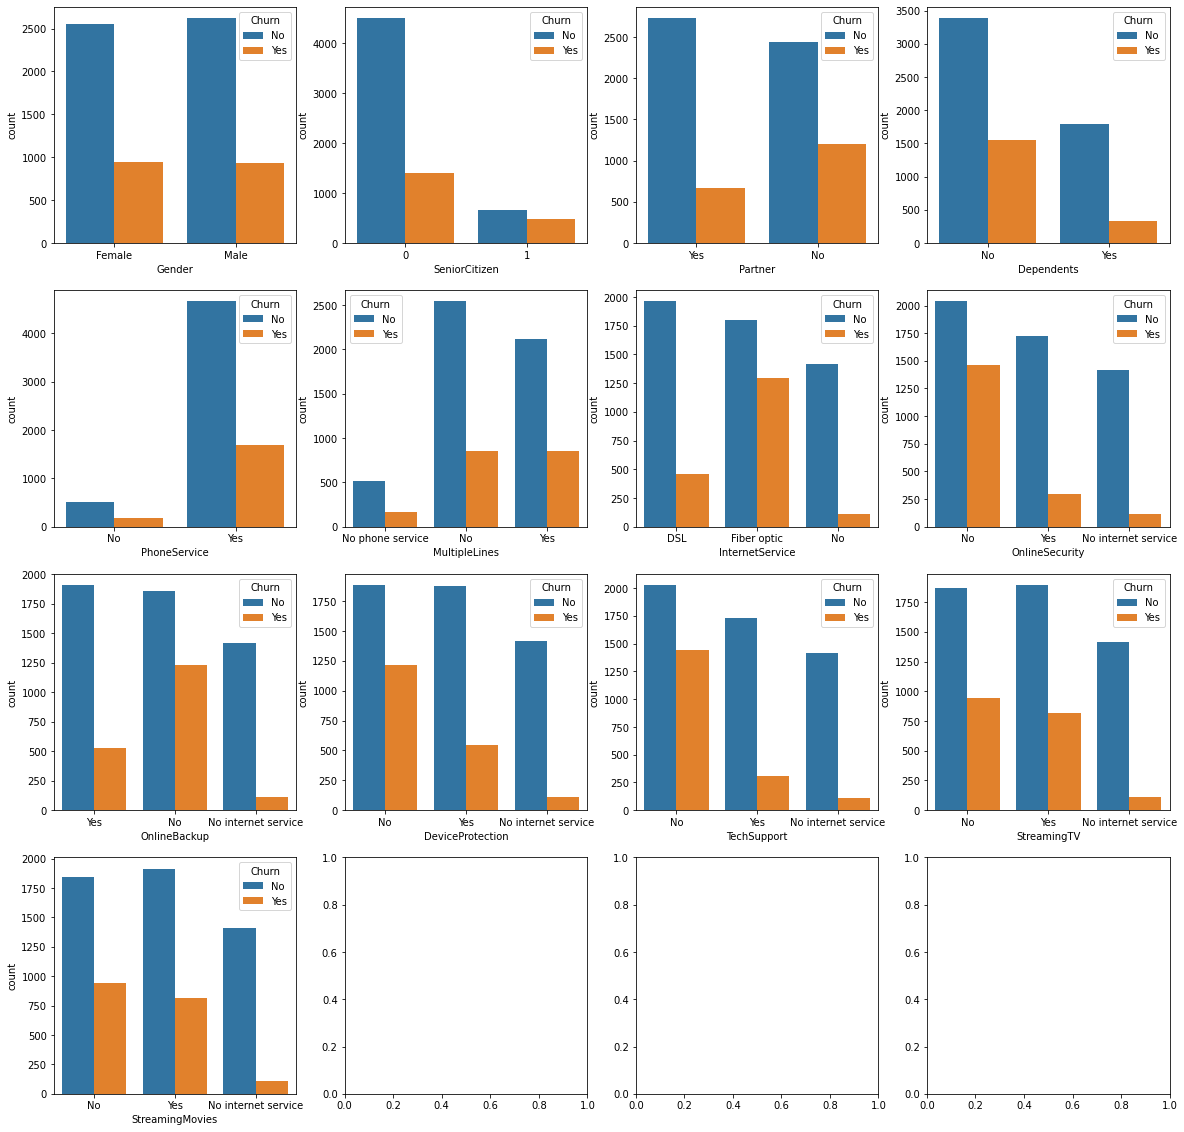

In [ ]:
# Definisikan fungsi untuk menghitung proporsi kategorikal
# list variable kategorikal
cat_var =["Gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=df, hue="Churn", ax=ax)

**Services that customer has signed up insight:** If a customer doesn’t have phone service, they can’t have multiple lines. but if customers have phone services they have a higher rate to churn. Customers who have fibre optic as an internet service are more likely to churn. This can happen due to high prices, competition, the service, and many other reasons. Fiber optic service is much more expensive than other internet service, which may be one of the reasons why customers churn. Customers with  OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport are more unlikely to churn. Streaming service is not predictive for churn as it’s evenly distributed to yes and no options.

### Numerical vs Churn

**Payment Method**

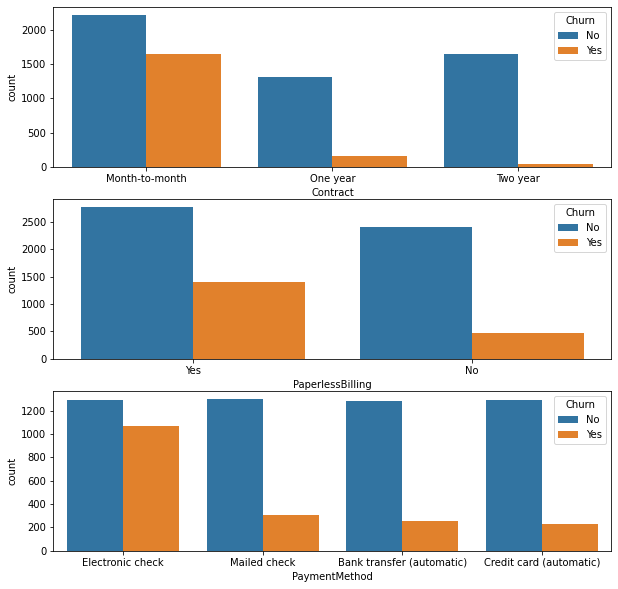

In [ ]:
# Definisikan fungsi untuk menghitung proporsi kategorikal
# list variable kategorikal
num_var =["Contract", "PaperlessBilling", "PaymentMethod"]

fig, axes = plt.subplots(3, 1, figsize=(10, 10))
for num, ax in zip(num_var, axes.flatten()):
    sns.countplot(num, data=df, hue="Churn", ax=ax)

**Payment insights:** The shorter the contract, the higher the churn rate. Those with more extended plans face additional barriers when canceling early. This clearly explains the motivation for companies to have long-term relationships with their customers. Churn Rate is higher for the customers who opted for paperless billing. About 59.2% of customers use paperless billing. Customers who pay with electronic checks are more likely to churn, and this kind of payment is more common than other payment types.

### Boxplot for Outliers

**Total Charges vs Churn**

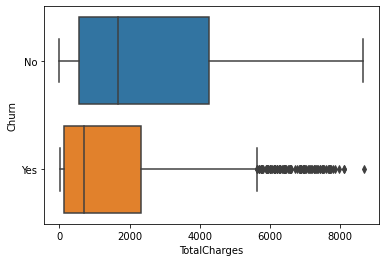

In [ ]:
sns.boxplot(data=df, x='TotalCharges', y="Churn")

**Interpretasi**

terlihat bahwa pelanggan yang memiliki total charges yang kecil itu lebih cenderung untuk churn. namun terlihat bahwa pada data pelanggan yang churn terdapat banyak outlier, dimana bila yang mereka spet itu terlalu besar sekitar 6000++ maka mereka churn, mungkin pelayanan atau apa yang dia dapat itu dirasa tidak sesuai atau kurang worth it, tapi ini perlu di analisis lebih lanjut untuk mengetahuinya

**Monthly Charges vs Churn**

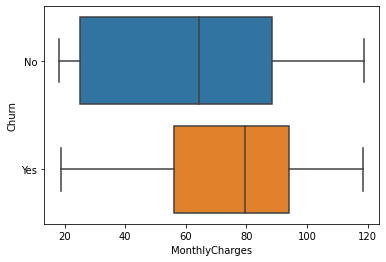

In [ ]:
sns.boxplot(data=df, x='MonthlyCharges', y="Churn")

**Interpretasi**

terlihat pelanggan dengan monthly charges yang tinggi itu malah lebih cenderung untuk churn dari pada pelanggan yang memiliki median monthly charges rendah, mungkin dengan tingginya biaya yang dispend perbulan ini tidak sesuai dengan apa yang mereka dapat jadi membuat mereka tidak puas sehingga mengakibatkan churn, namun itu perlu di analisis lebih lanjut

**Tenure**

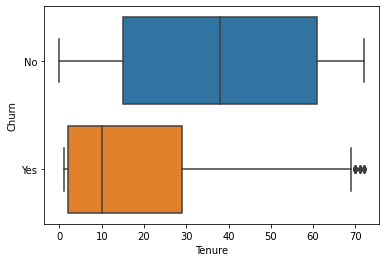

In [ ]:
sns.boxplot(data=df, x='Tenure', y="Churn")

**Interpretasi**

terlihat juga median data yang sangat jauh antara data churn dan tidak churn, pelanggan dengan tenure rendah itu lebih cenderung untuk churn dari pada pelanggan-pelanggan yang memiliki median tenurenya lebih tinggi. jadi semakin lama mereka itu berlangganan dengan perusahaan maka mereka akan cenderung lebih loyal dan tidak churn

# CP : Dummy Variable & Split Data

#### Drop Table Unused

In [ ]:
#drop column `CustomerID` cause we dont need that for machine learning
df.drop(['CustomerID'],axis=1,inplace = True)

### Customize Data

In [ ]:
# data transformation

# Change Definition
df['PaymentMethod'] = df['PaymentMethod'].replace({'Electronic check':'Check', 'Mailed check':'Check', 'Bank transfer (automatic)':'Bank/Credit Card','Credit card (automatic)':'Bank/Credit Card'})

In [ ]:
#handling inconsistency
df["MultipleLines"] = df["MultipleLines"].replace("No phone service","No")
df["OnlineSecurity"] = df["OnlineSecurity"].replace("No internet service","No")
df["DeviceProtection"] = df["DeviceProtection"].replace("No internet service","No")
df["OnlineBackup"] = df["OnlineBackup"].replace("No internet service","No")
df["TechSupport"] = df["TechSupport"].replace("No internet service","No")
df["StreamingTV"] = df["StreamingTV"].replace("No internet service","No")
df["StreamingMovies"] = df["StreamingMovies"].replace("No internet service","No")

mentransformasi data agar memiliki format yang seragam dan memudahkan analisis yakni memasukkan kategori yang "No internet service" menjadi "No", dan juga menjadikan kategori yang ada pada `PaymentMethod` menjadi Check dan Bank/Credit Card. 

---

### Encoding ->Mapping 

In [ ]:
data=df.copy()

In [ ]:
data['SeniorCitizen'] = data['SeniorCitizen'].replace({'No':0, 'Yes':1})
data['Contract'] = data['Contract'].replace({'Month-to-month':0, 'One year':1, 'Two year':1})
data['PaymentMethod'] = data['PaymentMethod'].replace({'Check':0, 'Bank/Credit Card':1})
data['Gender'] = data['Gender'].replace({'Male':1, 'Female':0})
data['Partner'] = data['Partner'].replace({'No':0, 'Yes':1})
data['Dependents'] = data['Dependents'].replace({'No':0, 'Yes':1})
data['PhoneService'] = data['PhoneService'].replace({'No':0, 'Yes':1})
data['MultipleLines'] = data['MultipleLines'].replace({'No':0, 'Yes':1})
data['InternetService'] = data['InternetService'].replace({'No':0, 'DSL':1,'Fiber optic':1})
data['OnlineSecurity'] = data['OnlineSecurity'].replace({'No':0, 'Yes':1})
data['OnlineBackup'] = data['OnlineBackup'].replace({'No':0, 'Yes':1})
data['DeviceProtection'] = data['DeviceProtection'].replace({'No':0, 'Yes':1})
data['TechSupport'] = data['TechSupport'].replace({'No':0, 'Yes':1})
data['StreamingTV'] = data['StreamingTV'].replace({'No':0, 'Yes':1})
data['StreamingMovies'] = data['StreamingMovies'].replace({'No':0, 'Yes':1})
data['PaperlessBilling'] = data['PaperlessBilling'].replace({'No':0, 'Yes':1})
data['Churn'] = data['Churn'].replace({'No':0, 'Yes':1})

In [ ]:
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,0,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,1,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1


### Train Test Split

In [ ]:
X = data.drop(['Churn'],axis=1)

In [ ]:
y = data.Churn.values

In [ ]:
from imblearn import under_sampling, over_sampling

#X = df_numeric.drop(['survived'],axis=1)
#y = df_numeric['survived']

# Undersampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X, y)

# Overampling
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X, y)

# Overampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

In [ ]:
#assign Class_att column as y attribute
y = data.Churn.values

#drop Class_att column, remain only numerical columns
new_data = data.drop(["Churn"],axis=1)

#Normalize values to fit between 0 and 1. 
x = (new_data-np.min(new_data))/(np.max(new_data)-np.min(new_data)).values

In [ ]:
#Split data into Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [ ]:
#Split data into Train and Test for Oversampling
from sklearn.model_selection import train_test_split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2,random_state =1)

# CP Modeling

## Define Model

**KNN**

In [ ]:
# define k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn_over = KNeighborsClassifier(n_neighbors = 5)

**Decision Tree**

In [ ]:
# define decision tree classifier
dtree = DecisionTreeClassifier(
    max_depth = 5, ccp_alpha = 0.001
)
# define decision tree classifier
dtree_over = DecisionTreeClassifier(
    max_depth = 5, ccp_alpha = 0.001
)

**Random Forest**

In [ ]:
# define Random Forest classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=1000)
rf_over = RandomForestClassifier(n_estimators=1000, random_state=1000)

**SVM RBF**

In [ ]:
svc_model = SVC(random_state = 1000, probability=True)
svc_over = SVC(random_state = 1000, probability=True)

**XGBoost**

In [ ]:
# fit model no training data
xgb = XGBClassifier(n_estimators=1000, random_state=1000)
xgb_over = XGBClassifier(n_estimators=1000, random_state=1000)

## Fitting Model to Data

**KNN**

In [ ]:
# fit model to data
knn.fit(X_train, y_train)
# fit prediction model to data
y_pred_knn = knn.predict(X_test)

In [ ]:
#With Oversampling
# fit model to data
knn_over.fit(X_train_over, y_train_over)
# fit prediction model to data
y_pred_knn_over = knn_over.predict(X_test_over)

**Decision Tree**

In [ ]:
# fit model to data
dtree.fit(X_train, y_train)
# fit prediction model to data
y_pred_dtree = dtree.predict(X_test)

In [ ]:
# fit model to data
dtree_over.fit(X_train_over, y_train_over)
# fit prediction model to data
y_pred_dtree_over = dtree_over.predict(X_test_over)

**Random Forest**

In [ ]:
# fit model to data
rf.fit(X_train, y_train)
# fit prediction model to data
y_pred_rf = rf.predict(X_test)

In [ ]:
# fit model to data
rf_over.fit(X_train_over, y_train_over)
# fit prediction model to data
y_pred_rf_over = rf_over.predict(X_test_over)

**SVM RBF**

In [ ]:
# fit model to data
svc_model.fit(X_train,y_train)
# fit prediction model to data
y_pred_svc = svc_model.predict(X_test)

In [ ]:
# fit model to data
svc_over.fit(X_train_over, y_train_over)
# fit prediction model to data
y_pred_svc_over = svc_over.predict(X_test_over)

**XGBoost**

In [ ]:
# fit model to data
xgb.fit(X_train, y_train)
# fit prediction model to data
y_pred_xgb = xgb.predict(X_test)

In [ ]:
# fit model to data
xgb_over.fit(X_train_over, y_train_over)
# fit prediction model to data
y_pred_xgb_over = xgb_over.predict(X_test_over)

## Model Evaluation

In [ ]:
# knn prediction
knn_pred = knn.predict(X_test)
knn_pred_proba = knn.predict_proba(X_test)

# decision tree prediction
dtree_pred = dtree.predict(X_test)
dtree_pred_proba = dtree.predict_proba(X_test)

# random forest prediction
rf_pred = rf.predict(X_test)
rf_pred_proba = rf.predict_proba(X_test)

# SVM RBF prediction
svm_pred = svc_model.predict(X_test)
svm_pred_proba = svc_model.predict_proba(X_test)

# XGBoost prediction
xgb_pred = xgb.predict(X_test)
xgb_pred_proba = xgb.predict_proba(X_test)

In [ ]:
# knn prediction probability
knn_pred_proba_over = knn_over.predict_proba(X_test_over)

# decision tree prediction probability
dtree_pred_proba_over = dtree_over.predict_proba(X_test_over)

# random forest prediction probability
rf_pred_proba_over = rf_over.predict_proba(X_test_over)

# SVM RBF prediction probability
svm_pred_proba_over = svc_over.predict_proba(X_test_over)

# XGBoost prediction probability
xgb_pred_proba_over = xgb_over.predict_proba(X_test_over)

---

### KNN Evaluation

**Confusion Matrix**

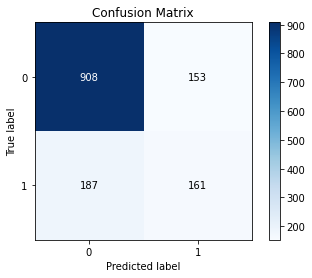

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, knn_pred)

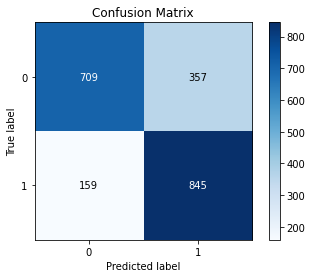

In [ ]:
#With Oversampling
skplt.metrics.plot_confusion_matrix(y_test_over, y_pred_knn_over)

**Classification Report**

In [ ]:
# KNN prediction result
pd.DataFrame(metrics.classification_report(y_test, knn_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.829224,0.512739,0.758694,0.670981,0.751057
recall,0.855796,0.462644,0.758694,0.659220,0.758694
f1-score,0.842301,0.486405,0.758694,0.664353,0.754400
support,1061.000000,348.000000,0.758694,1409.000000,1409.000000


In [ ]:
# KNN prediction result Oversampling
pd.DataFrame(metrics.classification_report(y_test_over, y_pred_knn_over, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.816820,0.702995,0.750725,0.759908,0.761612
recall,0.665103,0.841633,0.750725,0.753368,0.750725
f1-score,0.733195,0.766092,0.750725,0.749644,0.749151
support,1066.000000,1004.000000,0.750725,2070.000000,2070.000000


**ROC Curve**

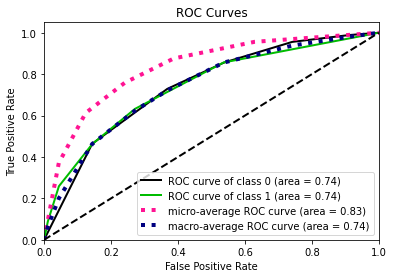

In [ ]:
# KNN result
skplt.metrics.plot_roc_curve(y_test, knn_pred_proba)

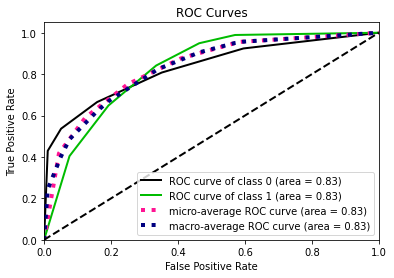

In [ ]:
# KNN result
skplt.metrics.plot_roc_curve(y_test_over, knn_pred_proba_over)

### Decision Tree Evaluation

**Confusion Matrix**

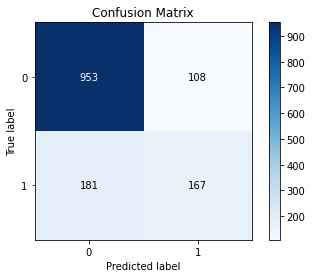

In [ ]:
# Decision Tree result
skplt.metrics.plot_confusion_matrix(y_test, dtree_pred)

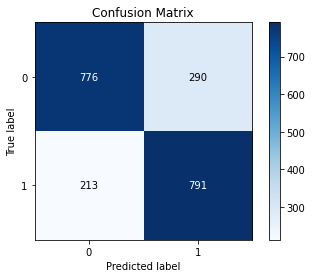

In [ ]:
# Decision Tree result Oversampling
skplt.metrics.plot_confusion_matrix(y_test_over, y_pred_dtree_over)

**Classification Report**

In [ ]:
# Decision Tree prediction result
pd.DataFrame(metrics.classification_report(y_test, dtree_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.840388,0.607273,0.79489,0.723830,0.782812
recall,0.898209,0.479885,0.79489,0.689047,0.794890
f1-score,0.868337,0.536116,0.79489,0.702226,0.786284
support,1061.000000,348.000000,0.79489,1409.000000,1409.000000


In [ ]:
# Decision Tree prediction result Oversampling
pd.DataFrame(metrics.classification_report(y_test_over, y_pred_dtree_over, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.784631,0.731730,0.757005,0.758180,0.758973
recall,0.727955,0.787849,0.757005,0.757902,0.757005
f1-score,0.755231,0.758753,0.757005,0.756992,0.756939
support,1066.000000,1004.000000,0.757005,2070.000000,2070.000000


**ROC Curve**

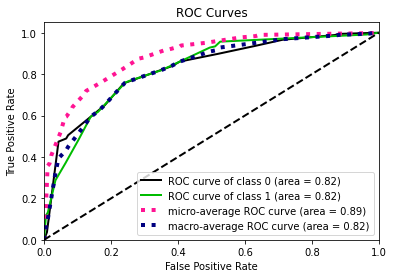

In [ ]:
# Decision Tree perceptron result
skplt.metrics.plot_roc_curve(y_test, dtree_pred_proba)

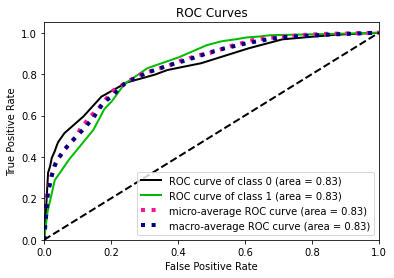

In [ ]:
# Decision Tree perceptron result
skplt.metrics.plot_roc_curve(y_test_over, dtree_pred_proba_over)

### Random Forest

**Confusion Matrix**

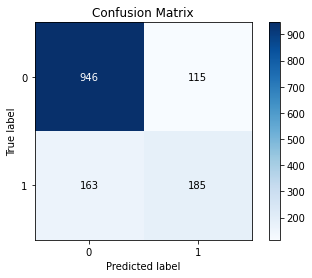

In [ ]:
# random forest result
skplt.metrics.plot_confusion_matrix(y_test, rf_pred)

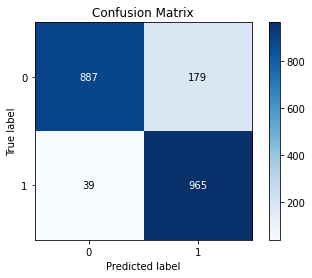

In [ ]:
# random forest result Oversampling
skplt.metrics.plot_confusion_matrix(y_test_over, y_pred_rf_over)

**Classification Report**

In [ ]:
# random forest prediction result
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.853021,0.616667,0.802697,0.734844,0.794645
recall,0.891612,0.531609,0.802697,0.711610,0.802697
f1-score,0.871889,0.570988,0.802697,0.721439,0.797572
support,1061.000000,348.000000,0.802697,1409.000000,1409.000000


In [ ]:
# random forest prediction result Oversampling
pd.DataFrame(metrics.classification_report(y_test_over, y_pred_rf_over, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.957883,0.843531,0.894686,0.900707,0.902420
recall,0.832083,0.961155,0.894686,0.896619,0.894686
f1-score,0.890562,0.898510,0.894686,0.894536,0.894417
support,1066.000000,1004.000000,0.894686,2070.000000,2070.000000


**ROC Curve**

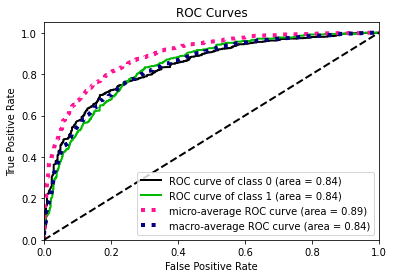

In [ ]:
# random forest result
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba)

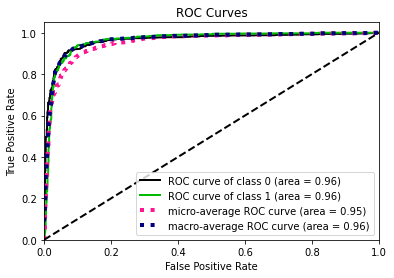

In [ ]:
# random forest result
skplt.metrics.plot_roc_curve(y_test_over, rf_pred_proba_over)

### SVM RBF

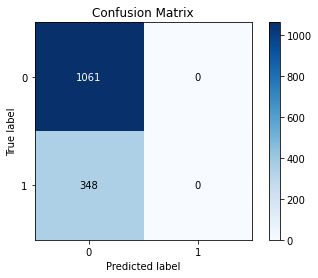

In [ ]:
# svm result
skplt.metrics.plot_confusion_matrix(y_test, svm_pred)

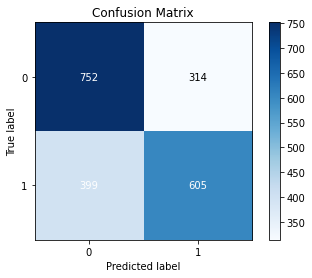

In [ ]:
# svm result
skplt.metrics.plot_confusion_matrix(y_test_over, y_pred_svc_over)

In [ ]:
#SVM prediction result
pd.DataFrame(metrics.classification_report(y_test, svm_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.753016,0.0,0.753016,0.376508,0.567034
recall,1.000000,0.0,0.753016,0.500000,0.753016
f1-score,0.859109,0.0,0.753016,0.429555,0.646923
support,1061.000000,348.0,0.753016,1409.000000,1409.000000


In [ ]:
#SVM prediction result Oversampling
pd.DataFrame(metrics.classification_report(y_test_over, y_pred_svc_over, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.653345,0.658324,0.655556,0.655835,0.655760
recall,0.705441,0.602590,0.655556,0.654015,0.655556
f1-score,0.678394,0.629225,0.655556,0.653810,0.654546
support,1066.000000,1004.000000,0.655556,2070.000000,2070.000000


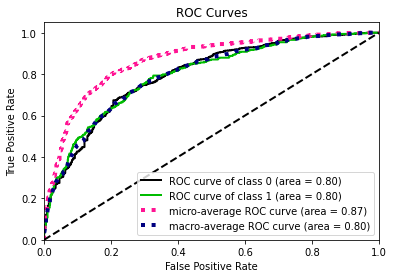

In [ ]:
# SVM perceptron result
skplt.metrics.plot_roc_curve(y_test, svm_pred_proba)

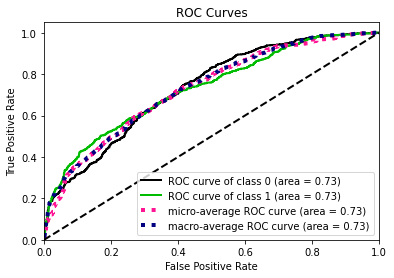

In [ ]:
# SVM perceptron result Oversampling
skplt.metrics.plot_roc_curve(y_test_over, svm_pred_proba_over)

### XGBoost

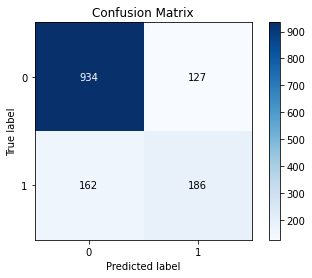

In [ ]:
# xgboost result
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred)

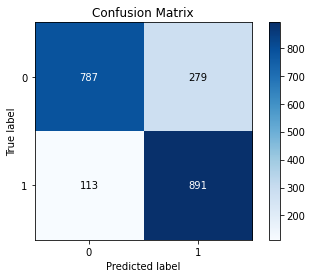

In [ ]:
# xgboost result
skplt.metrics.plot_confusion_matrix(y_test_over, y_pred_xgb_over)

In [ ]:
# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.852190,0.594249,0.79489,0.723219,0.788483
recall,0.880302,0.534483,0.79489,0.707392,0.794890
f1-score,0.866018,0.562784,0.79489,0.714401,0.791124
support,1061.000000,348.000000,0.79489,1409.000000,1409.000000


In [ ]:
# XGBoost prediction result Oversampling
pd.DataFrame(metrics.classification_report(y_test_over, y_pred_xgb_over, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.874444,0.761538,0.810628,0.817991,0.819682
recall,0.738274,0.887450,0.810628,0.812862,0.810628
f1-score,0.800610,0.819687,0.810628,0.810149,0.809863
support,1066.000000,1004.000000,0.810628,2070.000000,2070.000000


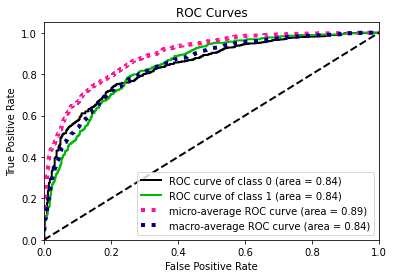

In [ ]:
# XGBoost perceptron result
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba)

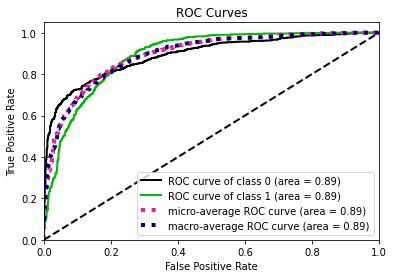

In [ ]:
# XGBoost perceptron result
skplt.metrics.plot_roc_curve(y_test_over, xgb_pred_proba_over)

In [ ]:
# the function that prints all scores
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [ ]:
print_scores("========KNN=========;",y_test, knn_pred)
print('========================')
print_scores("=========Decision Tree=========;",y_test, dtree_pred)
print('========================')
print_scores("=========Random Forest=========;",y_test, rf_pred)
print('========================')
print_scores("=========SVM=========;",y_test, svm_pred)
print('========================')
print_scores("=========XGBoost=========;",y_test, xgb_pred)

========KNN=========;
accuracy:  0.758694109297374
precision:  0.5127388535031847
recall:  0.46264367816091956
f1_score:  0.754400122578609
=========Decision Tree=========;
accuracy:  0.794889992902768
precision:  0.6072727272727273
recall:  0.47988505747126436
f1_score:  0.7862838275794005
=========Random Forest=========;
accuracy:  0.8026969481902059
precision:  0.6166666666666667
recall:  0.5316091954022989
f1_score:  0.7975715813212093
=========SVM=========;
accuracy:  0.7530163236337828
precision:  0.0
recall:  0.0
f1_score:  0.6469233355266749
=========XGBoost=========;
accuracy:  0.794889992902768
precision:  0.5942492012779552
recall:  0.5344827586206896
f1_score:  0.7911237798232993


In [ ]:
print_scores("========KNN Oversampling Data Test=========;",y_test_over, y_pred_knn_over)
print('========================')
print_scores("=========Decision Tree Oversampling Data Test=========;",y_test_over, y_pred_dtree_over)
print('========================')
print_scores("=========Random Forest Oversampling Data Test=========;",y_test_over, y_pred_rf_over)
print('========================')
print_scores("=========SVM Oversampling Data Test=========;",y_test_over, y_pred_svc_over)
print('========================')
print_scores("=========XGBoost Oversampling Data Test=========;",y_test_over, y_pred_xgb_over)

========KNN Oversampling Data Test=========;
accuracy:  0.7507246376811594
precision:  0.7029950083194676
recall:  0.8416334661354582
f1_score:  0.7491513016922278
=========Decision Tree Oversampling Data Test=========;
accuracy:  0.7570048309178744
precision:  0.7317298797409806
recall:  0.7878486055776892
f1_score:  0.756939327835309
=========Random Forest Oversampling Data Test=========;
accuracy:  0.8946859903381642
precision:  0.8435314685314685
recall:  0.9611553784860558
f1_score:  0.8944172176249868
=========SVM Oversampling Data Test=========;
accuracy:  0.6555555555555556
precision:  0.6583242655059848
recall:  0.602589641434263
f1_score:  0.6545460459224263
=========XGBoost Oversampling Data Test=========;
accuracy:  0.8106280193236715
precision:  0.7615384615384615
recall:  0.8874501992031872
f1_score:  0.8098631027065913


from model evaluation, i choose the RFM model because it has a good score of recall, why we need to focus on recall? cause in Churn prediction, we need to minimize the False Negative. Despite the recall, RFM also has good score of other evaluation like accuracy, percision and f1-score

# Business Evaluation

**Lift Curve**

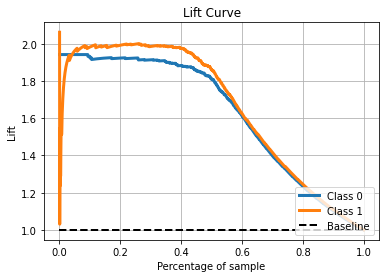

In [ ]:
skplt.metrics.plot_lift_curve(y_test_over, rf_pred_proba_over)

**Implementation**

if we took around 40% of samples, then our model's performance is 1.99 or 2 times better to predict the customer Churn than wihtout using model or random choice

**Cummulative Gain Curve**

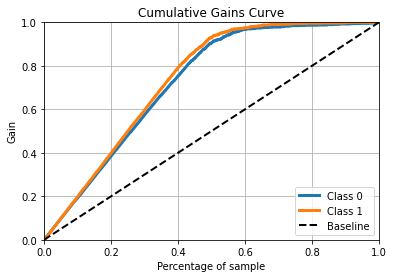

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test_over, rf_pred_proba_over)

**Implementation**


if we took 40% of samples, then approximately our model can take around 80% of the actual target class in the data that we can get instead of using random choice which is only 40%

**Profit Curve**

In [ ]:
def standard_confusion_matrix(y_true, y_pred):
    '''
    Reformat confusion matrix output from sklearn for plotting profit curve.
    '''
    [[tn, fp], [fn, tp]] = metrics.confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

def plot_profit_curve(model_object, costbenefit_mat, y_proba, y_test):
    '''
    Plot profit curve.

    INPUTS:
    - model object
    - cost benefit matrix in the same format as the confusion matrix above
    - predicted probabilities
    - actual labels
    '''

    # Profit curve data
    profits = [] # one profit value for each T (threshold)
    thresholds = sorted(y_proba, reverse=True)

    # For each threshold, calculate profit - starting with largest threshold
    for T in thresholds:
        y_pred = (y_proba > T).astype(int)
        confusion_mat = metrics.confusion_matrix(y_test, y_pred)
        # Calculate total profit for this threshold
        profit = sum(sum(confusion_mat * costbenefit_mat)) / len(y_test)
        profits.append(profit)

    print(profits)
    # Profit curve plot
    model_name = model_object.__class__.__name__
    max_profit = max(profits)
    plt.plot(np.linspace(0, 1, len(y_test)), profits, label = '{}, max profit ${:.2f} per user'.format(model_name, max_profit))


In [ ]:
# create cost benefit matrix
costbenefit_mat = np.array([[0, -20*3],
                            [-15*3, - 15*3]])

In [ ]:
costbenefit_mat

array([[  0, -60],
       [-45, -45]])

the `cost benefit` matrix shows the cost that we should spend to treat the churned customer and how many that we can loss from the customer that we not predict to be churn but actualy they are churned depends on the confusion matrix of the best model.

let's say the company needs to spend 15$ per each customer to treat them to not churn in just 3 month

but if there are customers that we predict not churn but actually they are churned, we will lose about 60$ per customer

In [ ]:
# check model confusion matrix
metrics.confusion_matrix(y_test_over, y_pred_rf_over)

array([[887, 179],
       [ 39, 965]])

In [ ]:
rf_best_object = {
    'n_estimators':1000, 
    'random_state':1000
}

[-21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.82608695652174, -21.942028985507246, -21.94202898550724

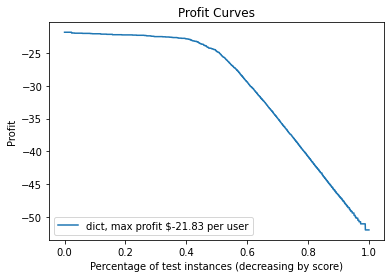

In [ ]:
plot_profit_curve(rf_best_object,costbenefit_mat, rf_pred_proba_over[:,1], y_test_over)
plt.xlabel('Percentage of test instances (decreasing by score)')
plt.ylabel('Profit')
plt.title('Profit Curves')
plt.legend(loc='lower left')
plt.show()

by using this model, the company will get a loss 21.83$ per customer to treat them to not churn, but if want to see the specific calculation between using this model and without using this model/random choice, let's see down below

### Simulation

In [ ]:
grouped = df.groupby(by='Churn').size()
grouped

Churn
No     5174
Yes    1869
dtype: int64

We have 1869 population of 1(positive Churn) so we use this to be our population in the business simulation because we just focusing on the Churn customer

*formula

- saved : treat * prediction
- failed : treat - saved
- profit : (cost + cost*margin rate) * saved
- netto : profit - total cost

---------

**took 20% of the sample**


- Population : 1869 -> total sample: 374
- Treat : 40%
- Model : 80%
- Random Choice(without model) : 40%
- cost : 15$
- margin rate : 5%

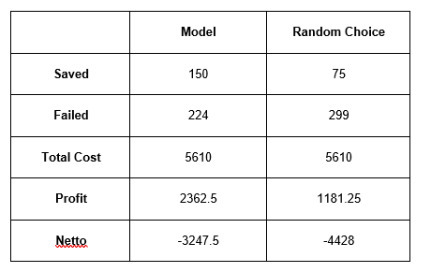

- loss 21.65 dollar per user (using model) & loss 59.04 dollar per user (without model)

----------

**took 40% of sample**

- Population : 1869 -> total sample : 748
- Treat : 40%
- Model : 80%
- Random Choice(without model) : 40%
- cost : 15$
- margin rate : 5%



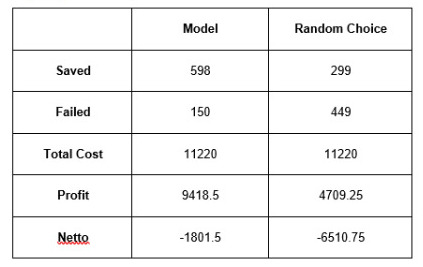

- loss -3 dollar per user (using model) & loss -21.78 dollar per user (without model)

----------------

**took 50% of sample**

- Population : 1869 -> total sample : 935
- Treat : 50%
- Model : 86%
- Random Choice(without model) : 45%
- cost : 15$
- margin rate : 5%


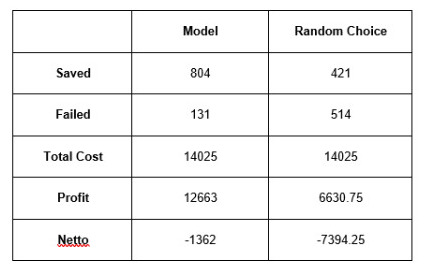

- loss 1.7 dollars per user (with model) & loss 17.6 per user (without model)


### Factors of Churn

**prediktif variabel**

- senior citizen -> customer yang bukan merupakan senior citizen memiliki jumlah churn lebih banyak, perusahaan dapat meretained dengan menyesuaikan sesuai dengan demografi usia
- phone service -> customer yang berlangganan phone service memiliki jumlah churn lebih banyak, perusahaan harus meningkatkan layanan phone service, tingkat churn yang tinggi menunjukkan ketidak puasan pelanggan, bisa karena layanan kurang maksimal, fasilitas dari kompetitor, atau keterlambatan dalam menghadapi kompplain
- internet service -> customer yang berlangganan internetservice dengan Fiber Optic lebih banyak churn, dikarenakan fiber optik memiliki harga yang lebih tinggi dibandingkan layanan lainnya, sehingga pelanggan merasa harga yang terlalu mahal tidak berbanding lurus dengan apa yang mereka dapatkan
- paperlessbilling -> customer dengan paperless billing memeliki churn lebih banyak, untuk hal perlu dilakukan analisis lebih lanjut mengenai faktor-faktor penyebab churn berdasarkan jenis pembayaran paperless billing
- contract -> lebih banyak customer yang churn pada jenis contract month-to-month, biasanya pelanggan yang berlangganan month-to-month memiliki kecenderungan untuk mencoba-coba terlebih dahulu, sehingga apabila dirasa layanan kurang maksimal, maka mereka dapat langsung berhenti berlanganan tanpa membayar denda yang biasanya dikenakan apabila kita melakukan churn dengan kontrak langganan tahunan.
- payment method -> lebih banyak customer yang churn pada jenis payment method electronic, untuk hal ini perusahaan perlu melakukan analisis lebih lanjut tentang kecenderungan churn pada pelanggan ber payment method electronic